# COVID-19 Data analysis & visualization

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime, date, time, timedelta
from scipy import stats
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# download the most recent COVID-19 dataset with wget using quite mode, timestamp (to only get the version diferent from local), and output directory
!wget -qNP data https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.xlsx

In [3]:
import platform
from pathlib import Path, PureWindowsPath
# linux path
filename = Path("data/owid-covid-data.xlsx").resolve()
# windows path
if platform.system() == 'Windows':
    filename = PureWindowsPath(filename)

### II. NL

In [4]:
# initial date to start analysis with
begin_date = datetime.strptime('20-02-2020', '%d-%m-%Y')
end_date = date.today()

In [5]:
df = pd.read_excel(filename, engine='openpyxl', index_col="date", parse_dates=True)
df_nl = df.query('iso_code == "NLD"')
df_nl.tail(10)

iso_code continent     location  total_cases  new_cases  \
date                                                                 
2021-01-28      NLD    Europe  Netherlands     979702.0     4730.0   
2021-01-29      NLD    Europe  Netherlands     984120.0     4418.0   
2021-01-30      NLD    Europe  Netherlands     988350.0     4230.0   
2021-01-31      NLD    Europe  Netherlands     992075.0     3725.0   
2021-02-01      NLD    Europe  Netherlands     995300.0     3225.0   
2021-02-02      NLD    Europe  Netherlands     998924.0     3624.0   
2021-02-03      NLD    Europe  Netherlands    1003010.0     4086.0   
2021-02-04      NLD    Europe  Netherlands    1007268.0     4258.0   
2021-02-05      NLD    Europe  Netherlands    1011636.0     4368.0   
2021-02-06      NLD    Europe  Netherlands    1015757.0     4121.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
date                                                                            
2021-01-28            4822.000       13925.0        84.0               69.429   
2021-01-29            4624.714       13981.0        56.0               64.714   
2021-01-30            4448.143       14069.0        88.0               64.714   
2021-01-31            4274.571       14108.0        39.0               66.000   
2021-02-01            4158.000       14135.0        27.0               64.143   
2021-02-02            4109.714       14218.0        83.0               63.714   
2021-02-03            4005.429       14281.0        63.0               62.857   
2021-02-04            3938.000       14346.0        65.0               60.143   
2021-02-05            3930.857       14407.0        61.0               60.857   
2021-02-06            3915.286       14468.0        61.0               57.000   

            total_cases_per_million  new_cases_per_million  \
date                                                         
2021-01-28                57175.913                276.045   
2021-01-29                57433.749                257.837   
2021-01-30                57680.614                246.865   
2021-01-31                57898.007                217.393   
2021-02-01                58086.220                188.213   
2021-02-02                58297.718                211.499   
2021-02-03                58536.179                238.461   
2021-02-04                58784.678                248.499   
2021-02-05                59039.597                254.919   
2021-02-06                59280.101                240.504   

            new_cases_smoothed_per_million  total_deaths_per_million  \
date                                                                   
2021-01-28                         281.414                   812.670   
2021-01-29                         269.901                   815.938   
2021-01-30                         259.596                   821.074   
2021-01-31                         249.466                   823.350   
2021-02-01                         242.663                   824.926   
2021-02-02                         239.845                   829.770   
2021-02-03                         233.759                   833.447   
2021-02-04                         229.824                   837.240   
2021-02-05                         229.407                   840.800   
2021-02-06                         228.498                   844.360   

            new_deaths_per_million  new_deaths_smoothed_per_million  \
date                                                                  
2021-01-28                   4.902                            4.052   
2021-01-29                   3.268                            3.777   
2021-01-30                   5.136                            3.777   
2021-01-31                   2.276                            3.852   
2021-02-01                   1.576                            3.743   
2021-02-02                   4.844                            3.718   
2021-02-03         

In [6]:
# start = pd.to_datetime('2020-10-15', format="%Y-%m-%d")
# end = pd.to_datetime('today', format="%Y-%m-%d")
# df_nl[start:end]

In [124]:
pd.set_option('display.max_colwidth', -1)
tmnl = pd.read_excel('data/Tijdslijn_Maatregelen_NL.xlsx', engine='openpyxl', parse_dates=True)
tmnl

Datum                                 Beschrijving
0  2020-02-27  Eerste besmetting met COVID-19             
1  2020-03-06  Eerste overlijden als gevolg van COVID-19  
2  2020-03-09  Regering komt met hygiene maatregelen      
3  2020-03-12  Thuisblijven bij klachten                  
4  2020-03-15  Horeca, sportclubs, sauna's, e.d. gesloten 
5  2020-03-16  Alle scholen / kinderdagverblijven gesloten
6  2020-03-23  Start intelligente lockdown                
7  2020-05-11  Basisscholen, kappers, zwembaden open      
8  2020-06-01  Horeca mag weer open (op 1,5 m)            
9  2020-07-01  Evenementen, OV weer toegankelijk          
10 2020-09-01  Begin studiejaar                           
11 2020-10-13  Gedeeltelijke lockdown                     
12 2020-11-03  Extra beperkingen op bezoekers             
13 2020-11-17  Versoepelingen publieke ruimtes            
14 2020-12-01  Mondkapjesplicht (coronawet)               
15 2020-12-14  Harde lockdown                             
16 2021-01-23  Avondklok

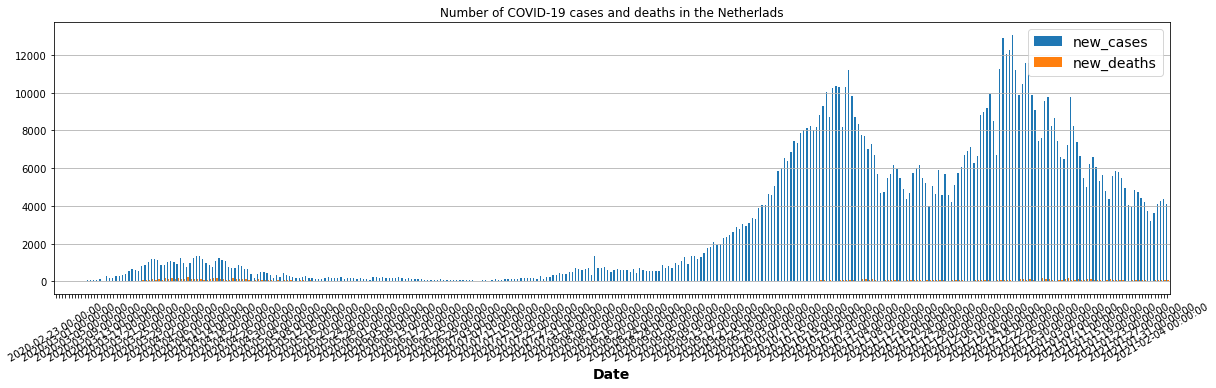

In [8]:
fig, ax = plt.subplots(figsize=(20,5))
df_nl[['new_cases', 'new_deaths']][begin_date.date():].plot(kind='bar', ax=ax, width=0.8, legend=True)
# fewer date ticks
every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.title("Number of COVID-19 cases and deaths in the Netherlads")
plt.legend(loc='upper right', prop={'size': 14})
plt.xlabel('Date', fontsize=14, fontweight="bold")
plt.grid(axis='y') 
plt.xticks(rotation=30)
plt.show()

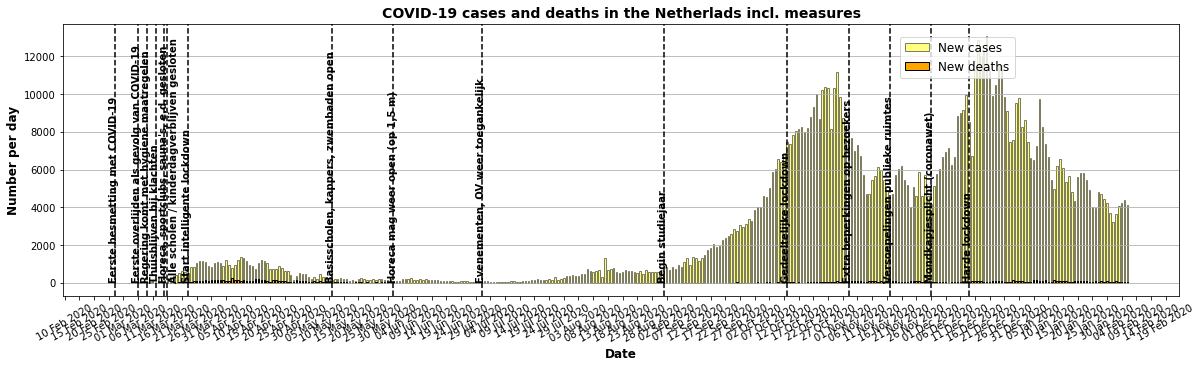

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(df_nl[begin_date.date():].index, df_nl[begin_date.date():]['new_cases'], width=0.5, alpha=0.5, color='yellow', edgecolor='black', align='center', label='New cases')
ax.bar(df_nl[begin_date.date():].index, df_nl[begin_date.date():]['new_deaths'], width=0.5, alpha=1.0, color='orange', edgecolor='black', align='center', label='New deaths')
# add timeline measures in NL 
for date, measure in zip(tmnl.Datum, tmnl.Beschrijving):
    ax.axvline(x=date.date(), ymax=df_nl['new_cases'].max(), color='black', linestyle='--')
    ax.text(date-timedelta(days=2)+(measure == "Alle scholen / kinderdagverblijven gesloten")*timedelta(days=2.5) \
            , 100, measure, color='black', fontsize=10, weight='heavy', rotation=90)
plt.title("COVID-19 cases and deaths in the Netherlads incl. measures", fontsize=14, fontweight="bold")
plt.legend(loc=(0.75, 0.8), prop={'size': 12})
plt.xlabel('Date', fontsize=12, fontweight="bold")
plt.ylabel('Number per day', fontsize=12, fontweight="bold")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
plt.xticks(rotation=30)
plt.grid(axis='y') 
if platform.system() == 'Windows':
    filename = "plots\covid-19_nl_incl_maatregelen.pdf"
else:
    filename = "plots/covid-19_nl_incl_maatregelen.pdf"
plt.savefig(filename, papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

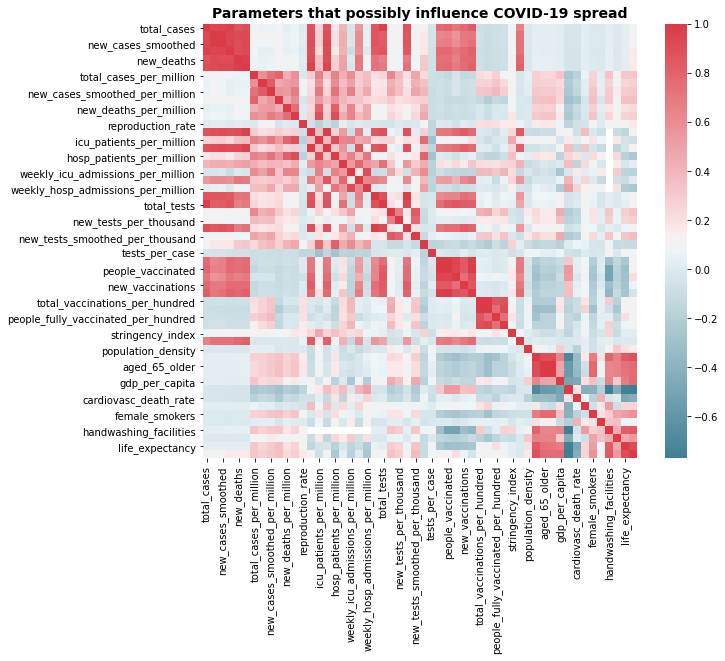

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr(method='pearson')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("Parameters that possibly influence COVID-19 spread", fontsize=14, fontweight="bold")
if platform.system() == 'Windows':
    filename = "plots\covid-19_parameters.pdf"
else:
    filename = "plots/covid-19_parameters.pdf"
plt.savefig(filename, papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

# Interactive plots

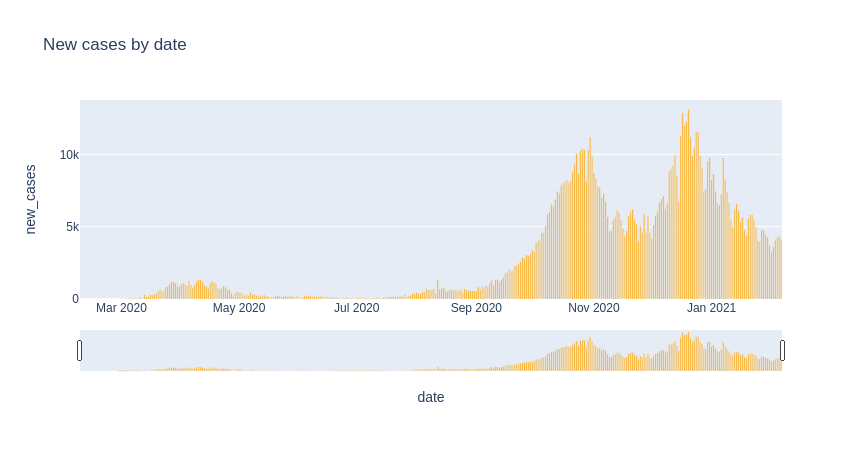

In [11]:
fig = px.bar(df_nl, x = df_nl.index, y = 'new_cases', title='New cases by date')
fig.update_traces(marker_color='orange')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

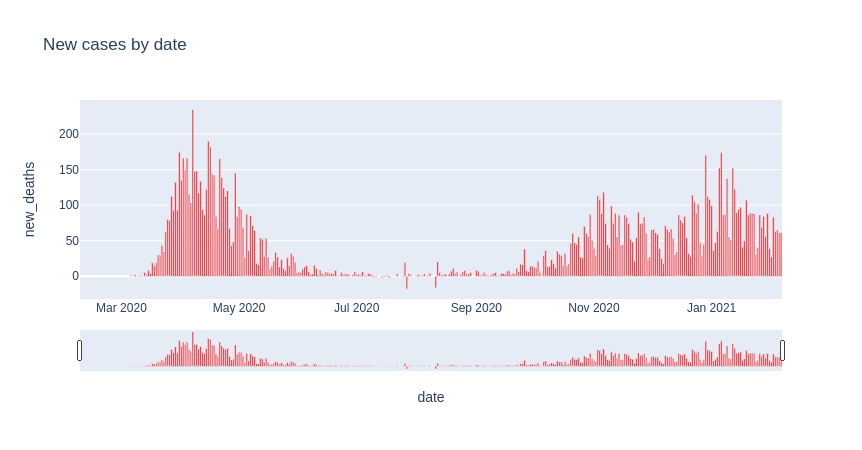

In [12]:
fig = px.bar(df_nl, x = df_nl.index, y = 'new_deaths', title='New cases by date')
fig.update_traces(marker_color='red')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# RIVM data

In [13]:
!wget -qNP data https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.csv

In [120]:
# linux path
filename = Path("data/COVID-19_aantallen_gemeente_per_dag.csv").resolve()
# windows path
if platform.system() == 'Windows':
    filename = PureWindowsPath(filename)

df = pd.read_csv(filename, sep=';', parse_dates=[0, 1], infer_datetime_format=True)
#df[df.Municipality_name == 'Amsterdam'].tail()
df.tail()

Date_of_report Date_of_publication Municipality_code  \
131161 2021-02-07 10:00:00 2021-02-07           NaN                
131162 2021-02-07 10:00:00 2021-02-07           NaN                
131163 2021-02-07 10:00:00 2021-02-07           NaN                
131164 2021-02-07 10:00:00 2021-02-07           NaN                
131165 2021-02-07 10:00:00 2021-02-07           NaN                

       Municipality_name       Province Security_region_code  \
131161  NaN               Limburg        VR23                  
131162  NaN               Limburg        VR24                  
131163  NaN               Zuid-Holland   VR15                  
131164  NaN               Fryslân        VR02                  
131165  NaN               Noord-Holland  VR11                  

        Security_region_name  Municipal_health_service  \
131161  Limburg-Noord         GGD Limburg-Noord          
131162  Limburg-Zuid          GGD Zuid-Limburg           
131163  Haaglanden            GGD Haaglanden             
131164  Fryslân               GGD Fryslân                
131165  Zaanstreek-Waterland  GGD Zaanstreek/Waterland   

                              ROAZ_region  Total_reported  Hospital_admission  \
131161  Netwerk Acute Zorg Limburg         0               0                    
131162  Netwerk Acute Zorg Limburg         2               0                    
131163  Netwerk Acute Zorg West            3               0                    
131164  Acute Zorgnetwerk Noord Nederland  1               0                    
131165  NaN                                0               0                    

        Deceased  
131161  0         
131162  0         
131163  0         
131164  0         
131165  0

In [15]:
#np.sort(df.Municipality_name.unique().astype(str))

In [96]:
df[df.Municipality_name == 'Amsterdam'][df.Date_of_publication >= start].groupby(['Date_of_publication', 'Municipality_name'])['Total_reported'].sum()

Date_of_publication  Municipality_name
2021-02-01           Amsterdam            116
2021-02-02           Amsterdam            132
2021-02-03           Amsterdam            152
2021-02-04           Amsterdam            179
2021-02-05           Amsterdam            245
2021-02-06           Amsterdam            134
2021-02-07           Amsterdam            158
Name: Total_reported, dtype: int64

In [118]:
start = pd.to_datetime('2021-02-01', format="%Y-%m-%d")

(
 df[df.Municipality_name.notnull()][df.Date_of_publication >= start]  
 .groupby(['Date_of_publication', 'Municipality_name'])
 ['Total_reported'].sum()
 .reset_index()
 .groupby('Date_of_publication').apply(lambda x: x.nlargest(3, 'Total_reported')).reset_index(drop=True)
 #.groupby(['Date_of_publication', 'Municipality_name'])
 #['Total_reported'].nlargest(3)
 #.sort_values(ascending=False)
 #.reset_index(drop=True)
)

Date_of_publication Municipality_name  Total_reported
0  2021-02-01           Amsterdam         116           
1  2021-02-01           Rotterdam         107           
2  2021-02-01           's-Gravenhage     71            
3  2021-02-02           Rotterdam         149           
4  2021-02-02           Amsterdam         132           
5  2021-02-02           's-Gravenhage     71            
6  2021-02-03           Amsterdam         152           
7  2021-02-03           Rotterdam         130           
8  2021-02-03           Eindhoven         79            
9  2021-02-04           Amsterdam         179           
10 2021-02-04           Rotterdam         137           
11 2021-02-04           's-Gravenhage     102           
12 2021-02-05           Amsterdam         245           
13 2021-02-05           Rotterdam         186           
14 2021-02-05           's-Gravenhage     100           
15 2021-02-06           Amsterdam         134           
16 2021-02-06           Rotterdam         115           
17 2021-02-06           's-Gravenhage     106           
18 2021-02-07           Amsterdam         158           
19 2021-02-07           Rotterdam         115           
20 2021-02-07           's-Gravenhage     98

In [16]:
gemeenten = ["Amsterdam", "Rotterdam", "'s-Gravenhage", "Utrecht"]
#features = ['Total_reported', 'Hospital_admission', 'Deceased']
features = 'Total_reported'
df_sum = df[df.Municipality_name.isin(gemeenten)].groupby(['Date_of_publication', 'Municipality_name'])[features].sum().unstack()
df_sum.tail(10)

Municipality_name    's-Gravenhage  Amsterdam  Rotterdam  Utrecht
Date_of_publication                                              
2021-01-29           109            166        128        67     
2021-01-30           91             177        102        48     
2021-01-31           100            210        115        45     
2021-02-01           71             116        107        45     
2021-02-02           71             132        149        39     
2021-02-03           58             152        130        55     
2021-02-04           102            179        137        45     
2021-02-05           100            245        186        55     
2021-02-06           106            134        115        53     
2021-02-07           98             158        115        59

In [17]:
check_date = datetime.strptime('01-10-2020', '%d-%m-%Y')

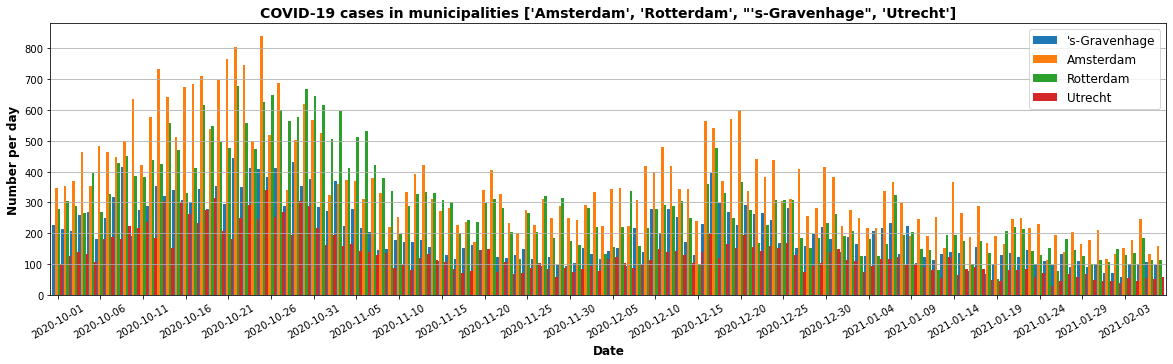

In [18]:
ax = df_sum[check_date.date():].plot.bar(figsize=(20,5), width=1.2)
plt.title(f"COVID-19 cases in municipalities {gemeenten}", fontsize=14, fontweight="bold")
plt.legend(loc='best', prop={'size': 12})
plt.xlabel('Date', fontsize=12, fontweight="bold")
plt.ylabel('Number per day', fontsize=12, fontweight="bold")
ax.set_xticks(range(0,len(df_sum[check_date.date():]), 5));
ax.set_xticklabels(["%s" % item for item in df_sum[check_date.date():].index.get_level_values(0).date.tolist()[::5]], rotation=30);
plt.grid(axis='y') 
plt.show()

In [19]:
# ax = df_sum.query('Date_of_publication > @begin_date').plot.bar(figsize=(20,5), width=1.2)
# plt.title(f"COVID-19 cases in municipality {gemeente}", fontsize=14, fontweight="bold")
# plt.legend(loc='best', prop={'size': 12})
# plt.xlabel('Date', fontsize=12, fontweight="bold")
# plt.ylabel('Number per day', fontsize=12, fontweight="bold")
# ax.set_xticks(range(0,len(df_sum), 5));
# ax.set_xticklabels(["%s" % item for item in df_sum.index.get_level_values(0).date.tolist()[::5]], rotation=30);
# plt.grid(axis='y') 
# plt.show()

In [20]:
!wget -qNP data https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv

In [21]:
# linux path
filename = Path('data/COVID-19_casus_landelijk.csv').resolve()
# windows path
if platform.system() == 'Windows':
    filename = PureWindowsPath(filename)

df_case = pd.read_csv(filename, sep=';', parse_dates=[0, 1], infer_datetime_format=True)
df_case.head()

Date_file Date_statistics Date_statistics_type Agegroup     Sex  \
0 2021-02-07 10:00:00 2020-01-01       DOO                  40-49    Female   
1 2021-02-07 10:00:00 2020-01-01       DOO                  50-59    Male     
2 2021-02-07 10:00:00 2020-01-01       DOO                  20-29    Female   
3 2021-02-07 10:00:00 2020-01-04       DOO                  10-19    Female   
4 2021-02-07 10:00:00 2020-01-06       DOO                  30-39    Male     

        Province Hospital_admission Deceased  Week_of_death  \
0  Noord-Holland  No                 No      NaN              
1  Gelderland     No                 No      NaN              
2  Zuid-Holland   No                 No      NaN              
3  Gelderland     Unknown            No      NaN              
4  Limburg        Unknown            Unknown NaN              

                             Municipal_health_service  
0  GGD Amsterdam                                       
1  Veiligheids- en Gezondheidsregio Gelderland-Midden  
2  GGD Hollands-Midden                                 
3  GGD Gelderland-Zuid                                 
4  GGD Zuid-Limburg

<AxesSubplot:xlabel='Sex,Agegroup'>

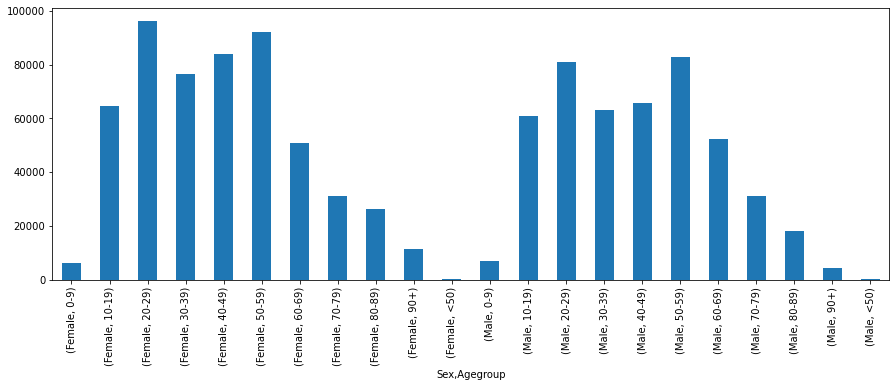

In [22]:
df_case[df_case.Sex.isin(['Male', 'Female'])][df_case.Agegroup != 'Unknown'].groupby(['Sex', 'Agegroup']).size().plot.bar(figsize=(15,5))

In [23]:
# from scipy.stats import ttest_ind
# ttest_ind(df_case[df_case.Sex == 'Male']['Hospital_admission'].values, df_case[df_case.Sex == 'Female']['Hospital_admission'].values)

In [24]:
# import seaborn as sns


# g = sns.catplot(x = "Agegroup", # x variable name
#             y = "Hospital_admission",       # y variable name
#             hue = "Sex",  # group variable name
#             data = df_case[df_case.Sex.isin(['Male', 'Female'])][df_case.Agegroup != 'Unknown'],     # dataframe to plot
#             kind = "bar")
# g.despine(left=True)
# g.set_axis_labels("Gender", "Count")
# g.legend.set_title("")

# Predictive modelling

### II. NL (forecasting with sktime)

In [25]:
df_nl.describe()

total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  3.460000e+02  346.000000    341.000000          338.000000     
mean   2.477798e+05  2935.713873   2942.578129         6825.511834    
std    3.105794e+05  3409.158695   3377.153061         3313.886927    
min    1.000000e+00  0.000000      3.429000            1.000000       
25%    4.530800e+04  199.250000    193.429000          5955.000000    
50%    6.527000e+04  918.500000    982.571000          6222.000000    
75%    4.359560e+05  5472.000000   5380.571000         8494.500000    
max    1.015757e+06  13072.000000  11804.000000        14468.000000   

       new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  338.000000  341.000000           346.000000                
mean   42.804734   41.878070            14460.557075              
std    46.555194   41.766297            18125.572319              
min   -18.000000  -1.286000             0.058000                  
25%    4.000000    3.571000             2644.198500               
50%    27.000000   24.857000            3809.190500               
75%    73.250000   70.143000            25442.616250              
max    234.000000  154.286000           59280.101000              

       new_cases_per_million  new_cases_smoothed_per_million  \
count  346.000000             341.000000                       
mean   171.329777             171.730364                       
std    198.960273             197.092390                       
min    0.000000               0.200000                         
25%    11.628500              11.289000                        
50%    53.604500              57.343000                        
75%    319.348750             314.013000                       
max    762.889000             688.888000                       

       total_deaths_per_million  new_deaths_per_million  \
count  338.000000                338.000000               
mean   398.340388                2.498086                 
std    193.400176                2.716992                 
min    0.058000                 -1.050000                 
25%    347.536750                0.233000                 
50%    363.119000                1.576000                 
75%    495.743250                4.275250                 
max    844.360000                13.656000                

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count  341.000000                       322.000000         340.000000     
mean   2.444021                         1.145963           373.723529     
std    2.437541                         0.400620           349.397982     
min   -0.075000                         0.640000           14.000000      
25%    0.208000                         0.860000           39.000000      
50%    1.451000                         1.060000           298.500000     
75%    4.094000                         1.360000           603.750000     
max    9.004000                         2.650000           1325.000000    

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count  340.000000                245.000000     245.000000                  
mean   21.810726                 854.289796     49.856788                   
std    20.391062                 724.016287     42.253965                   
min    0.817000                  63.000000      3.677000                    
25%    2.276000                  125.000000     7.295000                    
50%    17.421000                 551.000000     32.157000                   
75%    35.234750                 1573.000000    91.801000                   
max    77.328000                 2159.000000    126.000000                  

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count  49.000000              49.000000                           
mean   151.554367             8.844816                            
std    160.378309             9.359721                            
min    2.974000  

In [26]:
print("% of nan values per column")
for column in df_nl.columns:
    print(f"{column}: {df_nl[column].isna().sum()} / {len(df_nl)}")

% of nan values per column
iso_code: 0 / 349
continent: 0 / 349
location: 0 / 349
total_cases: 3 / 349
new_cases: 3 / 349
new_cases_smoothed: 8 / 349
total_deaths: 11 / 349
new_deaths: 11 / 349
new_deaths_smoothed: 8 / 349
total_cases_per_million: 3 / 349
new_cases_per_million: 3 / 349
new_cases_smoothed_per_million: 8 / 349
total_deaths_per_million: 11 / 349
new_deaths_per_million: 11 / 349
new_deaths_smoothed_per_million: 8 / 349
reproduction_rate: 27 / 349
icu_patients: 9 / 349
icu_patients_per_million: 9 / 349
hosp_patients: 104 / 349
hosp_patients_per_million: 104 / 349
weekly_icu_admissions: 300 / 349
weekly_icu_admissions_per_million: 300 / 349
weekly_hosp_admissions: 300 / 349
weekly_hosp_admissions_per_million: 300 / 349
new_tests: 349 / 349
total_tests: 303 / 349
total_tests_per_thousand: 303 / 349
new_tests_per_thousand: 349 / 349
new_tests_smoothed: 40 / 349
new_tests_smoothed_per_thousand: 40 / 349
positive_rate: 303 / 349
tests_per_case: 303 / 349
tests_units: 33 / 349
to

In [27]:
data = df_nl.drop(['iso_code', 'continent', 'location', 'new_tests', 'new_tests_per_thousand', 'total_tests', 'total_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'extreme_poverty', 'handwashing_facilities'], axis=1)

In [28]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting.forecasting import plot_ys

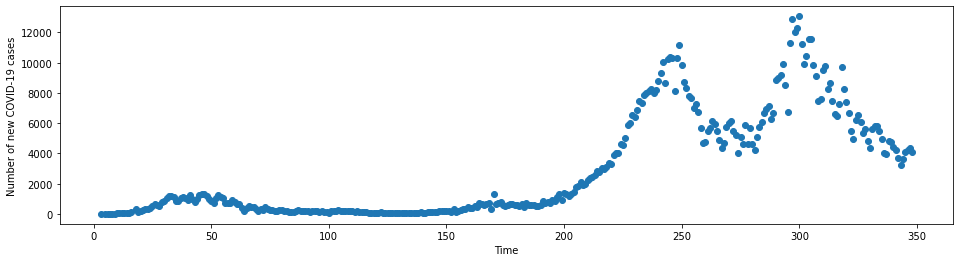

In [29]:
y = df_nl.reset_index()['new_cases']
y = y[y>0]
fig, ax = plot_ys(y)
ax.set(xlabel="Time", ylabel="Number of new COVID-19 cases");

324 20


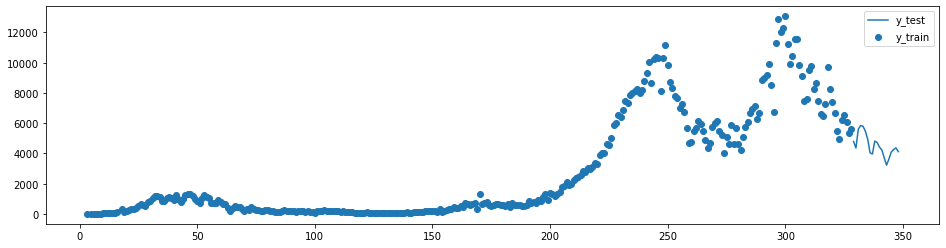

In [30]:
y_train, y_test = temporal_train_test_split(y, test_size=20)
plot_ys(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [31]:
fh = np.arange(len(y_test)) + 1

0.18164645691244893

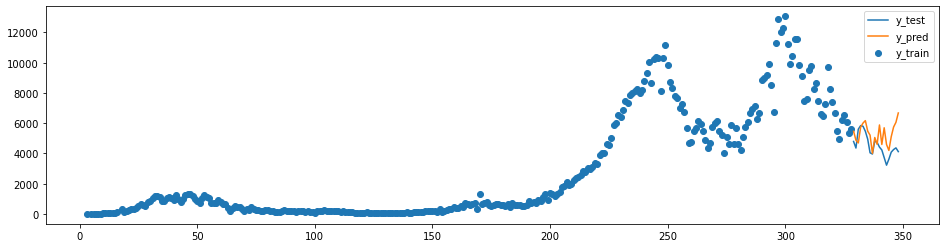

In [32]:
from sktime.forecasting.compose import ReducedRegressionForecaster
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=12, strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

0.17779539975580896

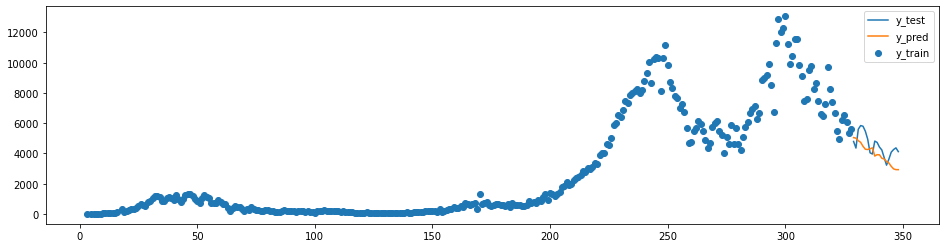

In [33]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend="add", seasonal="multiplicative", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

0.3450606277179099

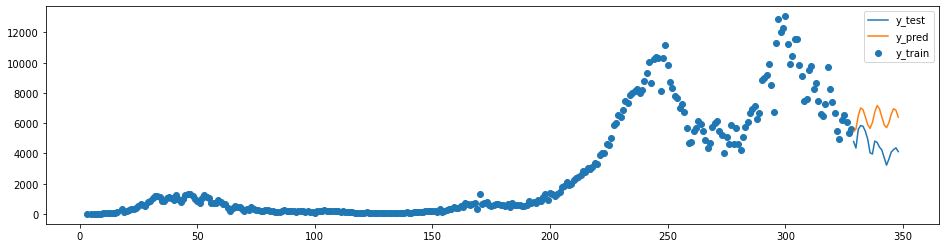

In [34]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

0.1576625245730978

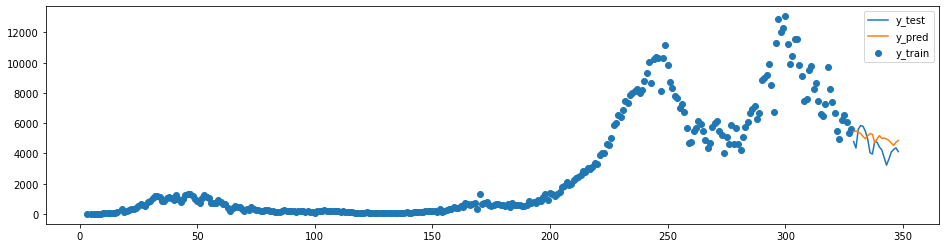

In [35]:
from sktime.forecasting.compose import EnsembleForecaster
forecaster = EnsembleForecaster([
    ("ses", ExponentialSmoothing(seasonal="multiplicative", sp=12)),
    ("holt", ExponentialSmoothing(trend="add", damped=False, seasonal="multiplicative", sp=12)),
    ("damped", ExponentialSmoothing(trend="add", damped=True, seasonal="multiplicative", sp=12))
])
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [36]:
from sktime.forecasting.model_selection import SlidingWindowSplitter, ForecastingGridSearchCV

forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=15, strategy="recursive")
param_grid = {"window_length": [5, 10, 15]}

# we fit the forecaster on the initial window, and then use temporal cross-validation to find the optimal parameter
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv.fit(y_train)
y_pred = gscv.predict(fh)

0.1705044700536218

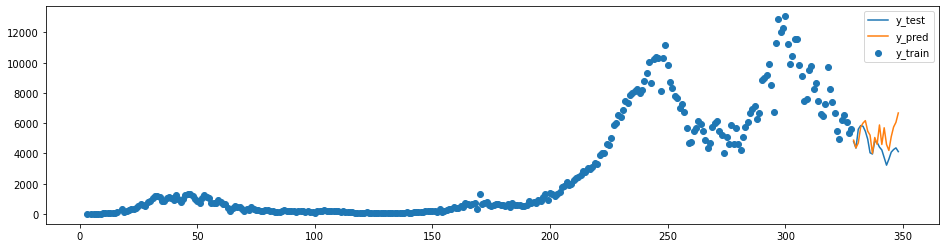

In [37]:
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [38]:
gscv.best_params_

{'window_length': 10}

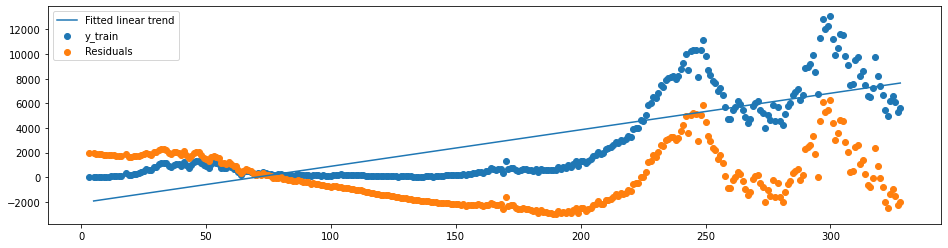

In [39]:
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformers.single_series.detrend import Detrender

# liner detrending
forecaster = PolynomialTrendForecaster(degree=1)
transformer = Detrender(forecaster=forecaster)
yt = transformer.fit_transform(y_train)

# internally, the Detrender uses the in-sample predictions of the PolynomialTrendForecaster
forecaster = PolynomialTrendForecaster(degree=1)
fh_ins = -np.arange(len(y_train)) # in-sample forecasting horizon
y_pred = forecaster.fit(y_train).predict(fh=fh_ins)

plot_ys(y_train, y_pred, yt, labels=["y_train", "Fitted linear trend", "Residuals"]);

0.67427300755091

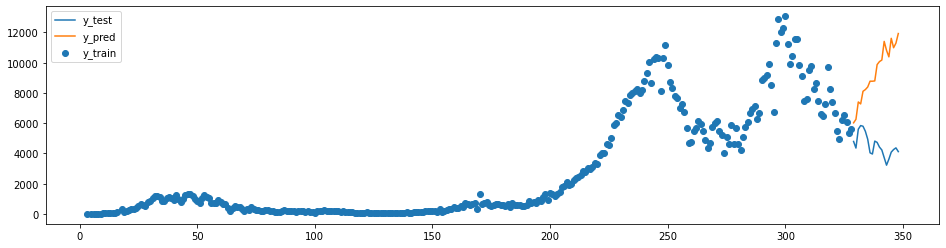

In [40]:
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformers.single_series.detrend import Deseasonalizer

forecaster = TransformedTargetForecaster([
    ("deseasonalise", Deseasonalizer(model="multiplicative", sp=12)),
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
    ("forecast", ReducedRegressionForecaster(regressor=regressor, window_length=15, strategy="recursive"))
])
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [41]:
from sktime.forecasting.naive import NaiveForecaster
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
cv = SlidingWindowSplitter(fh=1)
y_pred = forecaster.update_predict(y_test, cv)
smape_loss(y_test, y_pred)

0.09472909719192676

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

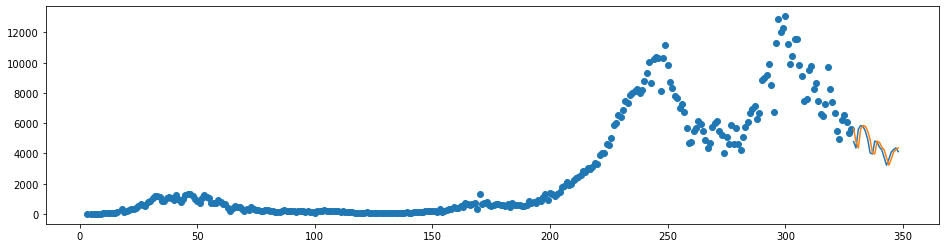

In [42]:
plot_ys(y_train, y_test, y_pred)

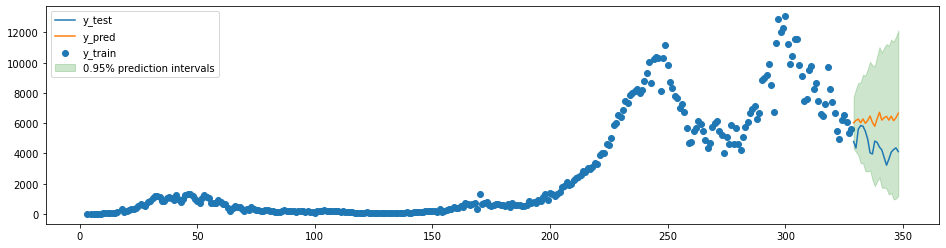

In [43]:
from sktime.forecasting.theta import ThetaForecaster
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)
alpha = 0.05  # 95% prediction intervals
y_pred, pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)
smape_loss(y_test, y_pred)

fig, ax = plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(y_pred.index, pred_ints["lower"], pred_ints["upper"], alpha=0.2, color="green", label=f"{1 - alpha}% prediction intervals")
plt.legend();

# Prediction with Prophet 

In [121]:
from fbprophet import Prophet

In [139]:
X = (
    df_nl[pd.to_datetime('2021-01-23', format="%Y-%m-%d"):]
    ['new_cases']
    .reset_index()
    .rename(columns = {'date':'ds', 'new_cases': 'y'})
)

In [141]:
m = Prophet()
m.fit(X)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [147]:
future = m.make_future_dataframe(periods=5)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
15 2021-02-07  3680.920228  3568.080059  3812.611583
16 2021-02-08  3057.122162  2935.388705  3180.212446
17 2021-02-09  3292.817753  3156.727078  3428.506767
18 2021-02-10  4026.475484  3870.673379  4183.186785
19 2021-02-11  4145.129111  3973.038335  4329.295095

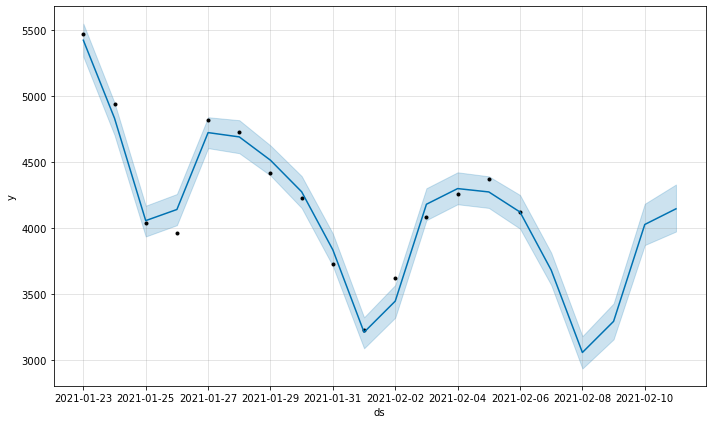

In [148]:
fig1 = m.plot(forecast)

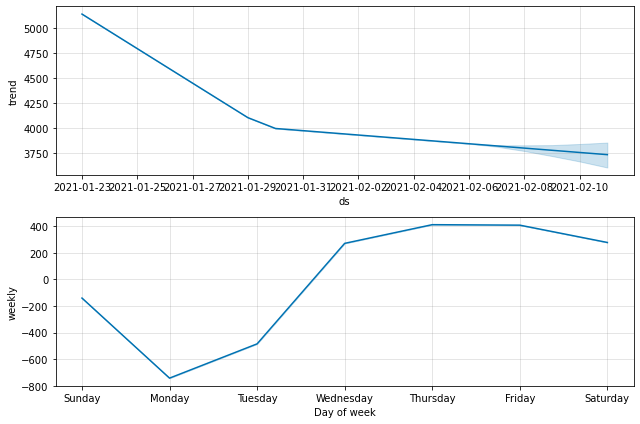

In [149]:
fig2 = m.plot_components(forecast)

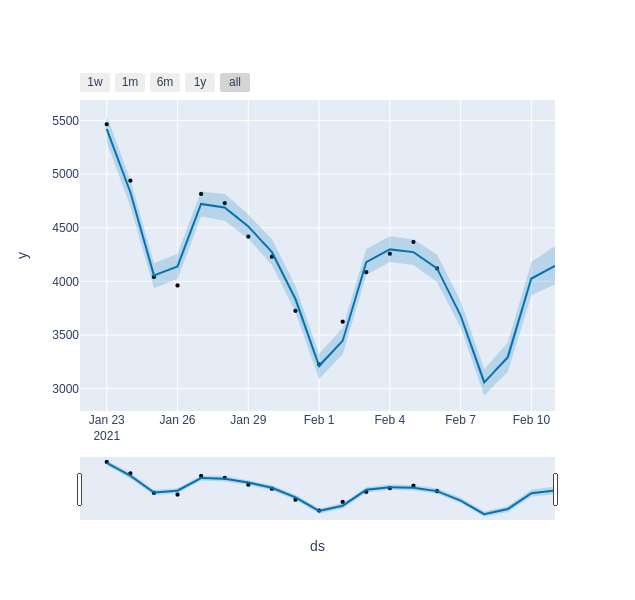

In [150]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

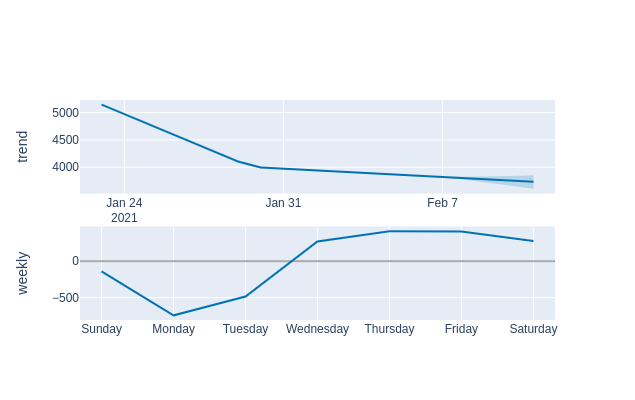

In [151]:
plot_components_plotly(m, forecast)